In [1]:
import numpy as np
from collections import Counter
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use( "fivethirtyeight" )

In [6]:
dataset = { 'k' : [[1, 2], [2, 3], [3, 1]],
            'r' : [[6, 5], [7, 7], [8, 6]] }
new_features = [4, 3]

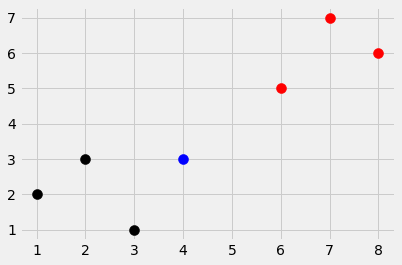

In [7]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter( ii[0], ii[1], s = 100, color = i ) # s stands for the size of a dot.
        
plt.scatter( new_features[0], new_features[1], s = 100, color = "blue" )
plt.show( )

In [39]:
def knn( data, predict, k = 3 ):
    if len( data ) >= k:
        warnings.warn( "k is less than the total number of classes!" )
        
    distances = []
    for group in data:
        for features in data[group]:
            euc_dist = np.linalg.norm( np.array( features ) - np.array( predict ) )
            distances.append( [euc_dist, group] )
    
    votes = [i[1] for i in sorted( distances )[:k]]
    vote_result = Counter( votes ).most_common( 1 )[0][0]
    confidence = Counter( votes ).most_common( 1 )[0][1] / k
    
    return vote_result, confidence


out, conf = knn( dataset, new_features, k = 3 )
print( out, conf )

k 0.6666666666666666


In [9]:
import pandas as pd

In [11]:
df = pd.read_csv( "breast-cancer-wisconsin.data",
                  names = ["Sample code number", "Clump thickness", "Uniformity of cell size",
                           "Uniformity of cell shape", "Marginal adhesion", "Single epithelial cell size",
                           "Bare nuclei", "Bland chromatin", "Normal nucleoli", "Mitoses", "Class"])
df

,Sample code number,Clump thickness,Uniformity of cell size,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [12]:
df.replace( '?', -99999, inplace = True )
df

,Sample code number,Clump thickness,Uniformity of cell size,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
df.drop( columns = ["Sample code number"], inplace = True )
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump thickness              699 non-null    int64 
 1   Uniformity of cell size      699 non-null    int64 
 2   Uniformity of cell shape     699 non-null    int64 
 3   Marginal adhesion            699 non-null    int64 
 4   Single epithelial cell size  699 non-null    int64 
 5   Bare nuclei                  699 non-null    object
 6   Bland chromatin              699 non-null    int64 
 7   Normal nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [16]:
df["Bare nuclei"] = df["Bare nuclei"].astype( "int" )

In [17]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump thickness              699 non-null    int64
 1   Uniformity of cell size      699 non-null    int64
 2   Uniformity of cell shape     699 non-null    int64
 3   Marginal adhesion            699 non-null    int64
 4   Single epithelial cell size  699 non-null    int64
 5   Bare nuclei                  699 non-null    int32
 6   Bland chromatin              699 non-null    int64
 7   Normal nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [18]:
full_data = df.values.tolist( )
full_data

[[5, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [5, 4, 4, 5, 7, 10, 3, 2, 1, 2],
 [3, 1, 1, 1, 2, 2, 3, 1, 1, 2],
 [6, 8, 8, 1, 3, 4, 3, 7, 1, 2],
 [4, 1, 1, 3, 2, 1, 3, 1, 1, 2],
 [8, 10, 10, 8, 7, 10, 9, 7, 1, 4],
 [1, 1, 1, 1, 2, 10, 3, 1, 1, 2],
 [2, 1, 2, 1, 2, 1, 3, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 1, 1, 5, 2],
 [4, 2, 1, 1, 2, 1, 2, 1, 1, 2],
 [1, 1, 1, 1, 1, 1, 3, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [5, 3, 3, 3, 2, 3, 4, 4, 1, 4],
 [1, 1, 1, 1, 2, 3, 3, 1, 1, 2],
 [8, 7, 5, 10, 7, 9, 5, 5, 4, 4],
 [7, 4, 6, 4, 6, 1, 4, 3, 1, 4],
 [4, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [4, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [10, 7, 7, 6, 4, 10, 4, 1, 2, 4],
 [6, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [7, 3, 2, 10, 5, 10, 5, 4, 4, 4],
 [10, 5, 5, 3, 6, 7, 7, 10, 1, 4],
 [3, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [8, 4, 5, 1, 2, -99999, 7, 3, 1, 4],
 [1, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [5, 2, 3, 4, 2, 7, 3, 6, 1, 4],
 [3, 2, 1, 1, 1, 1, 2, 1, 1, 2],
 [5, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [1, 1, 3, 1, 2, 1, 1, 1, 

In [47]:
accuracies = []

for i in range( 50 ):
    import random
    random.shuffle( full_data )

    test_size = 0.2
    train_set = { 2 : [], 4 : [] }
    test_set = { 2 : [], 4 : [] }
    train_data = full_data[:-int( test_size * len( full_data ) )]
    test_data = full_data[-int( test_size * len( full_data ) ):]

    for i in train_data:
        train_set[i[-1]].append( i[:-1] )
    for i in test_data:
        test_set[i[-1]].append( i[:-1] )

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, conf = knn( train_set, data, k = 5 )
            if group == vote:
                correct += 1
            total += 1

    accuracies.append( correct / total )
    
print( "Average accuracy:", sum( accuracies ) / len( accuracies ) )

Average accuracy: 0.9682014388489206


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

accuracies = []

for i in range( 50 ):
    X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size = 0.2 )
    model = KNeighborsClassifier( n_neighbors = 5 )
    model.fit( X_train, y_train )
    accuracies.append( model.score( X_test, y_test ) )
    
print( "Average accuracy:", sum( accuracies ) / len( accuracies ) )

Average accuracy: 0.9700000000000002
